## Import the Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load and Verify the Data

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Understand the Features

###### fixed acidity:  Non-volatile acids that do not evaporate readily.
###### volatile acidity:  High acetic acid in the wine which leads to an unpleasant vinegar taste.
###### citric acid:  Preservative to increase acidity.
###### residual sugar:  Amount Sugar remaining after fermentation stops.
###### chlorides:  Amount of salt in the wine.
###### free sulfur dioxide:  Prevents microbial growth and the oxidation of wine.
###### total sulfur dioxide:  Amount of free bound forms of SO2.
###### density:  Sweeter wines have a higher density.
###### pH:  Level of acidity.
###### sulphates:  Wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant.
###### alcohol:  Amount of alcohol in the wine.
###### quality: The target variable (what we’re trying to predict), which ranges from 3 to 8.

## Perform some Basic Maneuvers

In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Separate Features from Target

In [6]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']

## Split into Train and Test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state = 17)

## Create a Linear Regression Model

In [8]:
model = LinearRegression()

## Train the Model

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
prediction = model.predict(x_test)

## Evaluate the Model

In [11]:
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.4133140188386586
AR2 =  0.4082204546770368
MAE =  0.4856954243519712
RMSE =  0.6324515311127222


## Method 1: Apply a Scaler

In [12]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
MMS = MinMaxScaler()
wine.iloc[:, :-1] = MMS.fit_transform(wine.iloc[:, :-1])

In [14]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [15]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 17)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.4133140188386578
AR2 =  0.40822045467703605
MAE =  0.48569542435197227
RMSE =  0.6324515311127227


## Method 2: Address the Class Imbalance

In [16]:
wine = pd.read_csv('winequality-red.csv')

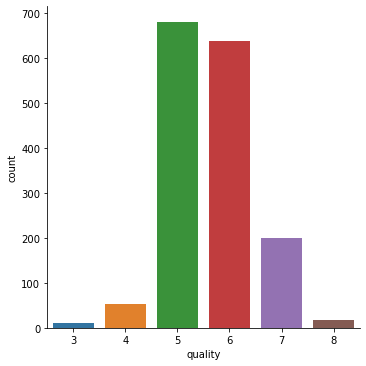

In [17]:
sns.catplot(x = 'quality', data = wine, kind = 'count')

In [18]:
wine['quality'] = wine['quality'].apply(lambda x: 0 if x < 6 else 1)

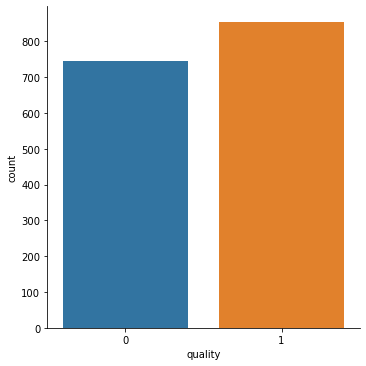

In [19]:
sns.catplot(x = 'quality', data = wine, kind = 'count')

In [20]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 17)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.3421299189615977
AR2 =  0.33641833972606305
MAE =  0.3523639708076357
RMSE =  0.40503870365552913


## Method 3: Use a Correlation Matrix for Feature Selection

In [21]:
wine = pd.read_csv('winequality-red.csv')

<AxesSubplot:>

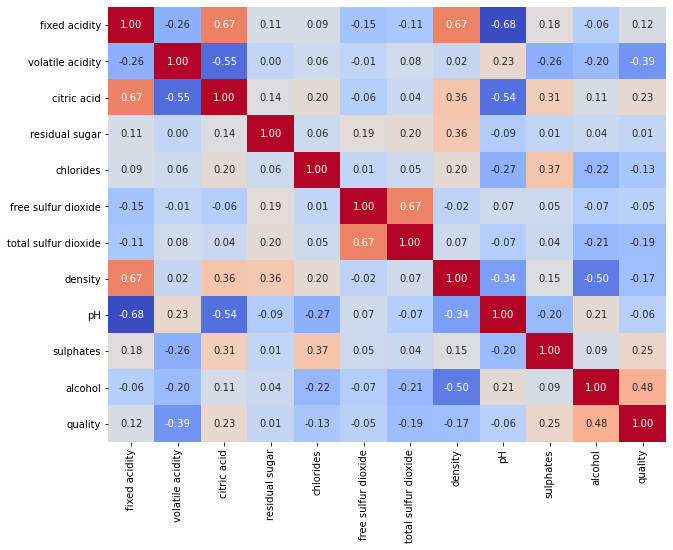

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

In [23]:
wine = wine.drop(['fixed acidity', 'free sulfur dioxide'], axis = 1)

<AxesSubplot:>

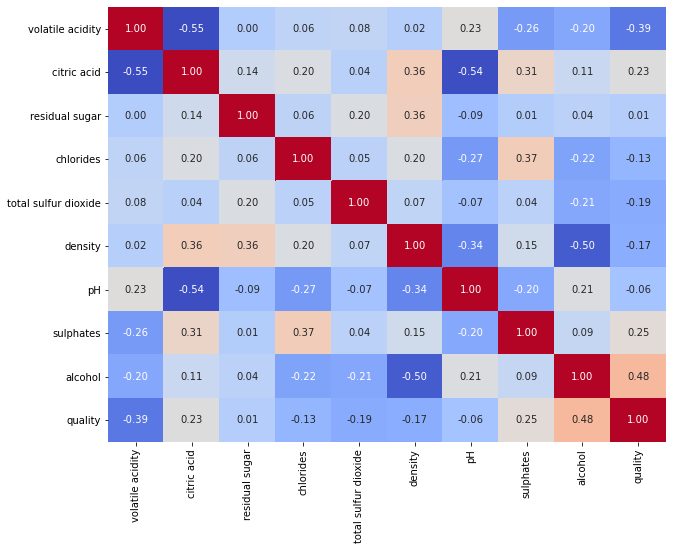

In [24]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

In [25]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 17)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.4207165220725019
AR2 =  0.41660812861202323
MAE =  0.4851553131537719
RMSE =  0.6284488904635648


In [26]:
wine = wine.drop(['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH'], axis = 1)

<AxesSubplot:>

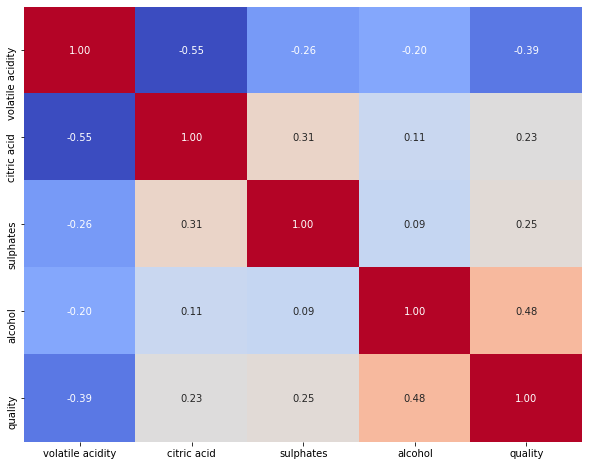

In [27]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

In [28]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 17)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.39297810240412334
AR2 =  0.3910722251746229
MAE =  0.5001605756660741
RMSE =  0.6433192868935456


## Method 4: Find and Delete Outliers

In [29]:
wine = pd.read_csv('winequality-red.csv')

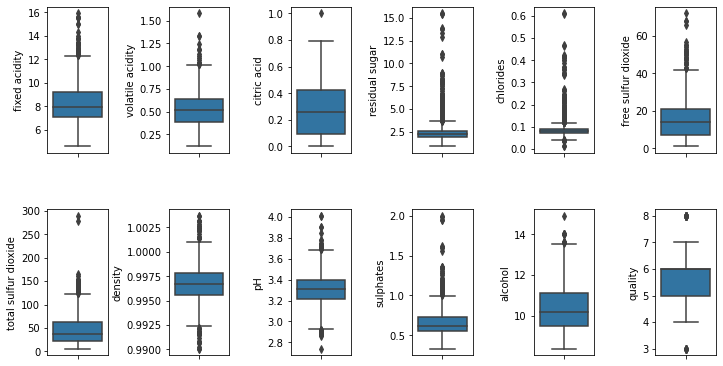

In [30]:
rows = 2
cols = 6
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 5))
index = 0
ax = ax.flatten()
for a, b in wine.items():
    sns.boxplot(y = a, data = wine, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

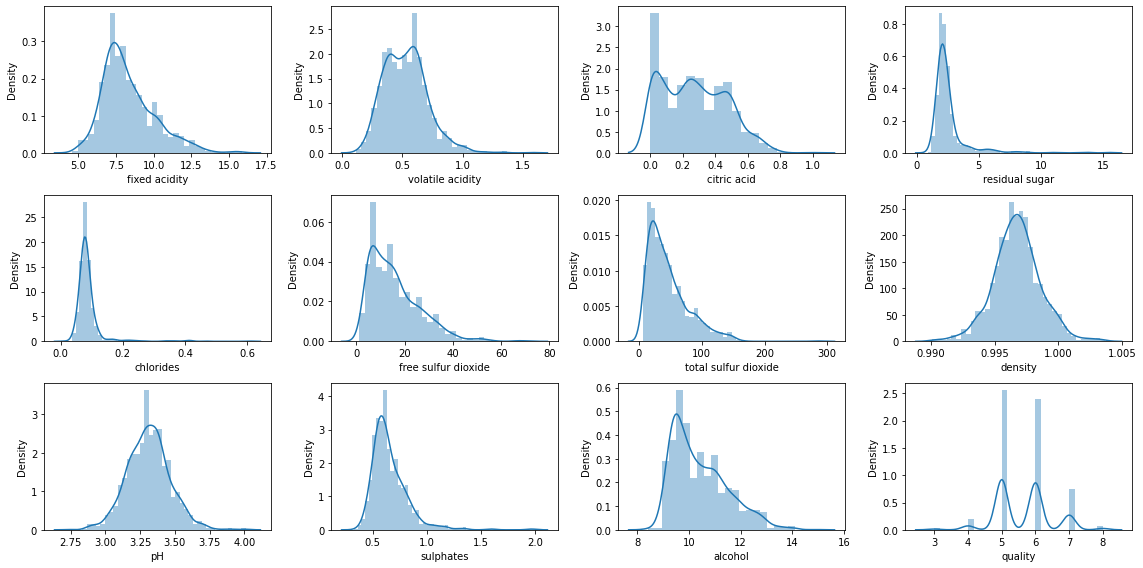

In [31]:
rows = 3
cols = 4
fix, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 8))
col = wine.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(wine[col[index]], ax = ax[i][j])
        index += 1
plt.tight_layout()

In [32]:
column_name = 'citric acid'

In [33]:
lower = wine[column_name].quantile(0.05)
upper = wine[column_name].quantile(0.95)
print('Lower = ', lower)
print('Upper = ', upper)

Lower =  0.0
Upper =  0.6


In [34]:
count1 = wine[(wine[column_name] < lower) | (wine[column_name] > upper)].count()
count2 = wine.count()
print('This will delete', count1[0], 'rows, or about', format((count1[0] * 100)/ count2[0], '.2f'), '% of the data.') 

This will delete 78 rows, or about 4.88 % of the data.


In [35]:
wine = wine.drop(wine[wine[column_name] < lower].index)
wine = wine.drop(wine[wine[column_name] > upper].index)

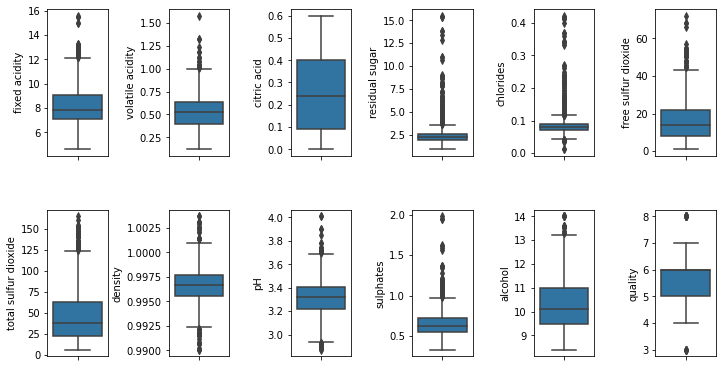

In [36]:
rows = 2
cols = 6
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 5))
index = 0
ax = ax.flatten()
for a, b in wine.items():
    sns.boxplot(y = a, data = wine, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

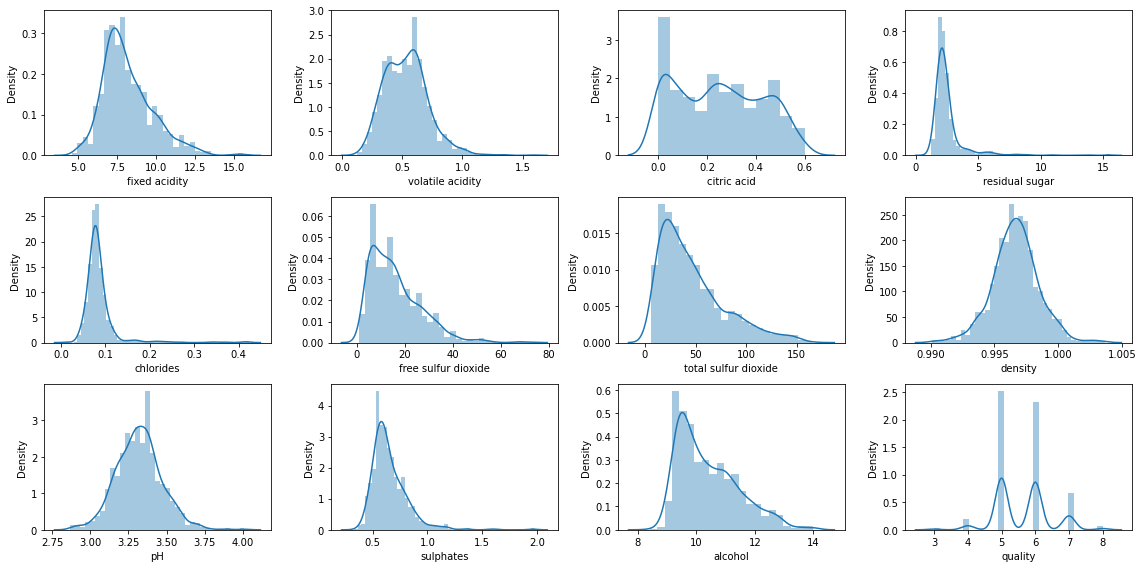

In [37]:
rows = 3
cols = 4
fix, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 8))
col = wine.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(wine[col[index]], ax = ax[i][j])
        index += 1
plt.tight_layout()

In [38]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 17)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.38448434224935146
AR2 =  0.37886086032638044
MAE =  0.48082014655508615
RMSE =  0.6182382359360149


## Method 5: Change the Training Size

In [39]:
wine = pd.read_csv('winequality-red.csv')

In [47]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state = 11)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.3140175559309494
AR2 =  0.3125622411990767
MAE =  0.5607283914539454
RMSE =  0.7091316885555434


## Method 6:  Add More Data

In [41]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')
wine = red.append(white)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [42]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 17)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('R2 = ',model.score(x_test, y_test))
print('AR2 = ', (1 - (1 - r2_score(y_test, prediction)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))))
print('MAE = ', np.mean(np.abs(y_test - prediction)))
print('RMSE = ', math.sqrt(mean_squared_error(prediction, y_test)))

R2 =  0.2959287770913075
AR2 =  0.29443508693663134
MAE =  0.5637020647505615
RMSE =  0.7273100839713826
